# Western States Pacing Plan Recommendation Evaluation

This notebook evaluates the recommendations made for the Western States stage paces. We look at the fastest case pacing plan recommendation, and the mean of cases pacing plan recommendation. 

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [40]:
pb = pd.read_csv('../../data/ws1_pb_times.csv', encoding = "ISO-8859-1")

In [41]:
pb.head()

,Unnamed: 0,gender_pb,runner_age_pb,Start to Lyon Ridge_pb,Start to Talbot Creek_pb,Lyon Ridge to Red Star Ridge_pb,Talbot Creek to Poppy Trailhead_pb,Red Star Ridge to Duncan Canyon_pb,Poppy Trailhead to Duncan Canyon_pb,Duncan Canyon to Mosquito Ridge_pb,Duncan Canyon to Robinson Flat_pb,Mosquito Ridge to Millers Defeat_pb,Robinson Flat to Millers Defeat_pb,Millers Defeat to Dusty Corners_pb,Dusty Corners to Last Chance_pb,Last Chance to Devils Thumb_pb,Devils Thumb to El Dorado Creek_pb,El Dorado Creek to Michigan Bluff_pb,Michigan Bluff to Foresthill_pb,Foresthill to Dardanelles_pb,Foresthill to Peachstone_pb,Dardanelles to Peachstone_pb,Peachstone to Fords Bar_pb,Peachstone to Rucky Chucky_pb,Rucky Chucky to Green Gate_pb,Green Gate to Auburn Lake Trails_pb,Auburn Lake Trails to Browns Bar_pb,Auburn Lake Trails to Quarry Road_pb,Browns Bar to Highway 49_pb,Quarry Road to Pointed Rocks_pb,Highway 49 to No Hands Bridge_pb,Pointed Rocks to No Hands Bridge_pb,No Hands Bridge to Robie Point_pb,Robie Point to Finish_pb,time_pb,AVG_Pace_pb
0,0,Male,42.0,8.718876,NaN,8.344569,NaN,6.594203,NaN,NaN,9.578947,NaN,7.727273,7.142857,6.705882,12.083333,8.536585,13.777778,8.879538,NaN,8.808333,NaN,NaN,9.401709,14.827586,10.000000,NaN,12.58427,NaN,13.965517,NaN,NaN,24.117647,9.714286,1516.400000,10.605747
1,1,Male,47.0,8.313253,NaN,8.314607,NaN,7.318841,NaN,NaN,9.894737,NaN,9.242424,7.142857,5.882353,12.222222,6.951220,13.777778,8.811881,NaN,8.214286,NaN,NaN,7.948718,12.758621,7.701149,7.272727,NaN,11.111111,NaN,7.567568,NaN,12.323529,8.269841,1397.266667,9.051986
2,2,Male,51.0,8.554217,NaN,8.651685,NaN,7.246377,NaN,NaN,10.315789,NaN,10.303030,9.464286,NaN,19.444444,8.292683,12.888889,9.108911,NaN,8.642857,NaN,NaN,NaN,48.965517,10.344828,11.948052,NaN,13.703704,NaN,NaN,NaN,26.156863,6.484127,1517.550000,13.559780
3,3,Male,51.0,7.951807,NaN,8.202247,NaN,7.391304,NaN,NaN,10.421053,NaN,10.909091,7.678571,NaN,22.361111,10.731707,14.000000,10.594059,NaN,10.785714,NaN,NaN,11.196581,15.517241,11.264368,12.727273,NaN,13.888889,NaN,9.729730,NaN,10.627451,8.785714,1664.583333,11.303364
4,4,Female,34.0,7.902610,NaN,7.764045,NaN,6.283816,NaN,NaN,8.842105,NaN,7.878788,6.428571,5.764706,10.000000,NaN,24.000000,7.613861,NaN,7.435714,NaN,NaN,7.692308,11.724138,8.160920,7.662338,NaN,9.814815,NaN,NaN,NaN,22.352941,7.460317,1267.666667,9.710111


In [42]:
pb = pb.filter(like = 'to')

In [43]:
best = pd.read_csv('../../data/ws_pb_top.csv', encoding = "ISO-8859-1")

In [44]:
best.head()

,Unnamed: 0,category,gender,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Start to Lyon Ridge_pb,Start to Talbot Creek_pb,Lyon Ridge to Red Star Ridge_pb,Talbot Creek to Poppy Trailhead_pb,Red Star Ridge to Duncan Canyon_pb,Poppy Trailhead to Duncan Canyon_pb,Duncan Canyon to Mosquito Ridge_pb,Duncan Canyon to Robinson Flat_pb,Mosquito Ridge to Millers Defeat_pb,Robinson Flat to Millers Defeat_pb,Millers Defeat to Dusty Corners_pb,Dusty Corners to Last Chance_pb,Last Chance to Devils Thumb_pb,Devils Thumb to El Dorado Creek_pb,El Dorado Creek to Michigan Bluff_pb,Michigan Bluff to Foresthill_pb,Foresthill to Dardanelles_pb,Foresthill to Peachstone_pb,Dardanelles to Peachstone_pb,Peachstone to Fords Bar_pb,Peachstone to Rucky Chucky_pb,Rucky Chucky to Green Gate_pb,Green Gate to Auburn Lake Trails_pb,Auburn Lake Trails to Browns Bar_pb,Auburn Lake Trails to Quarry Road_pb,Browns Bar to Highway 49_pb,Quarry Road to Pointed Rocks_pb,Highway 49 to No Hands Bridge_pb,Pointed Rocks to No Hands Bridge_pb,No Hands Bridge to Robie Point_pb,Robie Point to Finish_pb
0,0,Masters Men 1 (40-49),Male,6.325301,NaN,7.078652,NaN,6.014493,NaN,NaN,9.578947,NaN,10.606061,8.392857,6.235294,14.861111,10.609756,14.000000,8.118812,NaN,7.928571,NaN,NaN,10.256410,15.862069,9.655172,13.506494,NaN,13.148148,NaN,NaN,NaN,29.705882,10.111111,7.931727,NaN,8.239700,NaN,6.159420,NaN,NaN,8.631579,NaN,6.818182,6.428571,6.000000,9.722222,6.829268,12.000000,9.902640,NaN,7.213095,NaN,NaN,7.435897,11.379310,8.160920,NaN,8.314607,NaN,10.517241,NaN,NaN,21.470588,7.857143
1,1,Masters Men 1 (40-49),Male,8.140562,NaN,8.235955,NaN,6.852657,NaN,NaN,9.684211,NaN,10.151515,NaN,12.235294,11.527778,NaN,25.777778,8.288779,NaN,8.020238,NaN,NaN,8.205128,12.413793,9.310345,9.220779,NaN,11.111111,NaN,NaN,NaN,26.176471,7.492063,7.469880,NaN,8.314607,NaN,6.884058,NaN,NaN,9.157895,NaN,8.484848,5.892857,6.117647,10.138889,6.097561,11.333333,7.623762,NaN,6.928571,NaN,NaN,7.692308,14.137931,8.275862,8.571429,NaN,10.185185,NaN,6.486486,NaN,11.936275,10.642857
2,2,Masters Men 2 (50-59),Male,8.532129,NaN,9.029963,NaN,7.608696,NaN,NaN,12.105263,NaN,11.515152,8.214286,8.000000,13.055556,9.390244,13.777778,9.405941,NaN,10.000000,NaN,NaN,10.341880,14.827586,9.770115,10.259740,NaN,11.851852,NaN,NaN,NaN,26.754902,7.031746,8.912651,NaN,8.882022,NaN,7.101449,NaN,NaN,9.894737,NaN,7.575758,7.321429,6.823529,11.111111,7.439024,12.444444,7.849835,NaN,8.122619,NaN,NaN,7.777778,11.034483,8.735632,NaN,8.539326,NaN,9.655172,NaN,NaN,16.470588,7.317460
3,3,Masters Men 2 (50-59),Male,8.532129,NaN,9.029963,NaN,7.608696,NaN,NaN,12.105263,NaN,11.515152,8.214286,8.000000,13.055556,9.390244,13.777778,9.405941,NaN,10.000000,NaN,NaN,10.341880,14.827586,9.770115,10.259740,NaN,11.851852,NaN,NaN,NaN,26.754902,7.031746,8.912651,NaN,8.882022,NaN,7.101449,NaN,NaN,9.894737,NaN,7.575758,7.321429,6.823529,11.111111,7.439024,12.444444,7.849835,NaN,8.122619,NaN,NaN,7.777778,11.034483,8.735632,NaN,8.539326,NaN,9.655172,NaN,NaN,16.470588,7.317460
4,4,Senior Women (23-39),Female,6.987952,NaN,7.640449,NaN,5.434783,NaN,NaN,9.473684,NaN,9.090909,6.607143,5.764706,10.138889,6.463415,11.777778

In [45]:
best = best.filter(like = 'to')

In [46]:
best = best.filter(like = 'pb')

In [47]:
wt = pd.read_csv('../../data/ws_weighted_pb.csv', encoding = "ISO-8859-1")

In [48]:
cats = wt['category']
gen = wt['gender']
comb = [cats, gen]
comb = pd.concat(comb, axis=1)

In [49]:
wt = wt.filter(like = 'to')

In [50]:
wt = wt.filter(like = 'pb')

In [51]:
comb

,category,gender
0,Masters Men 1 (40-49),Male
1,Masters Men 1 (40-49),Male
2,Masters Men 2 (50-59),Male
3,Masters Men 2 (50-59),Male
4,Senior Women (23-39),Female
5,Senior Women (23-39),Female
6,Senior Women (23-39),Female
7,Senior Women (23-39),Female
8,Senior Women (23-39),Female
9,Senior Men (23-39),Male


# Mean Pace Rec

In [53]:
def differ(a, b):
    # Combine two lists (row and query run) into matrix
    matrix = pd.DataFrame({"A": a, "B": b})
    # Now drop any pairs containing NA so we only compare when we have two times
    matrix = matrix.dropna(axis = 0, how='any')
    # Parse back to two lists
    a = matrix[['A']]
    b = matrix[['B']]
    # Return cosine similarity (1 - cosine difference)
    return 1 - spatial.distance.cosine(a, b)

def sims(index):

    pb_segs = list(pb.loc[index])

    result = wt.apply(lambda row: differ(list(row), pb_segs), axis = 1)
    
    return result.loc[index]
    

sims(90)

0.93575330636814025

In [54]:
def update_rows(row):
    index = int(row['similarity'])
    row['similarity'] = sims(index)
   # row['ranked_mean'] = get_rank_mean(neighbours)
    return row

In [55]:
num_of_runs = wt['Start to Lyon Ridge_pb'].count()
filler_data = np.arange(0.0, num_of_runs)
df = pd.DataFrame({'similarity':filler_data})

df = df.apply(lambda row: update_rows(row), axis=1)
df = df[['similarity']]
df

,similarity
0,0.984172
1,0.993242
2,0.885499
3,0.950661
4,0.982858
5,0.971267
6,0.986511
7,0.982812
8,0.981350
9,0.983712


In [57]:
df.to_csv('../../data/ws_mean_similarity.csv')

In [58]:
df1 = comb.join(df)

In [59]:
df1.head()

,category,gender,similarity
0,Masters Men 1 (40-49),Male,0.984172
1,Masters Men 1 (40-49),Male,0.993242
2,Masters Men 2 (50-59),Male,0.885499
3,Masters Men 2 (50-59),Male,0.950661
4,Senior Women (23-39),Female,0.982858


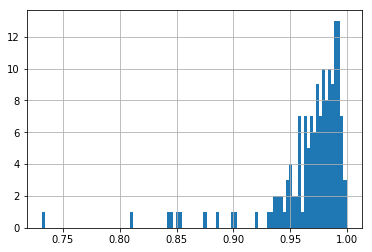

In [60]:
df1['similarity'].hist(bins = 100)

In [61]:
#df1.to_csv('../../data/mean_row_error.csv')

In [62]:
df1.to_csv('../../data/ws_mean_similarity.csv')

In [63]:
df1 = pd.read_csv('../../data/ws_mean_similarity.csv')

In [64]:
male = df1[df1.gender == 'Male']

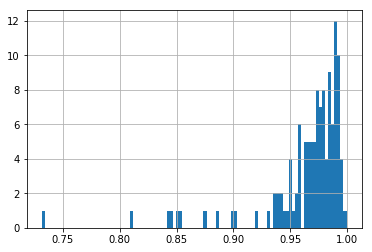

In [65]:
male['similarity'].hist(bins = 100)

In [66]:
female = df1[df1.gender == 'Female']

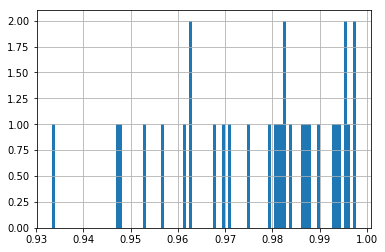

In [67]:
female['similarity'].hist(bins = 100)

In [68]:
d_test = df1.groupby('category').mean()

In [69]:
d_test

,Unnamed: 0,similarity
category,,
Masters Men 1 (40-49),76.039216,0.962824
Masters Men 2 (50-59),83.681818,0.963426
Masters Men 3 (60-69),104.000000,0.949273
Masters Women 1 (40-49),85.416667,0.971847
Masters Women 2 (50-59),124.600000,0.990838
Senior Men (23-39),69.818182,0.967570
Senior Women (23-39),47.785714,0.977081


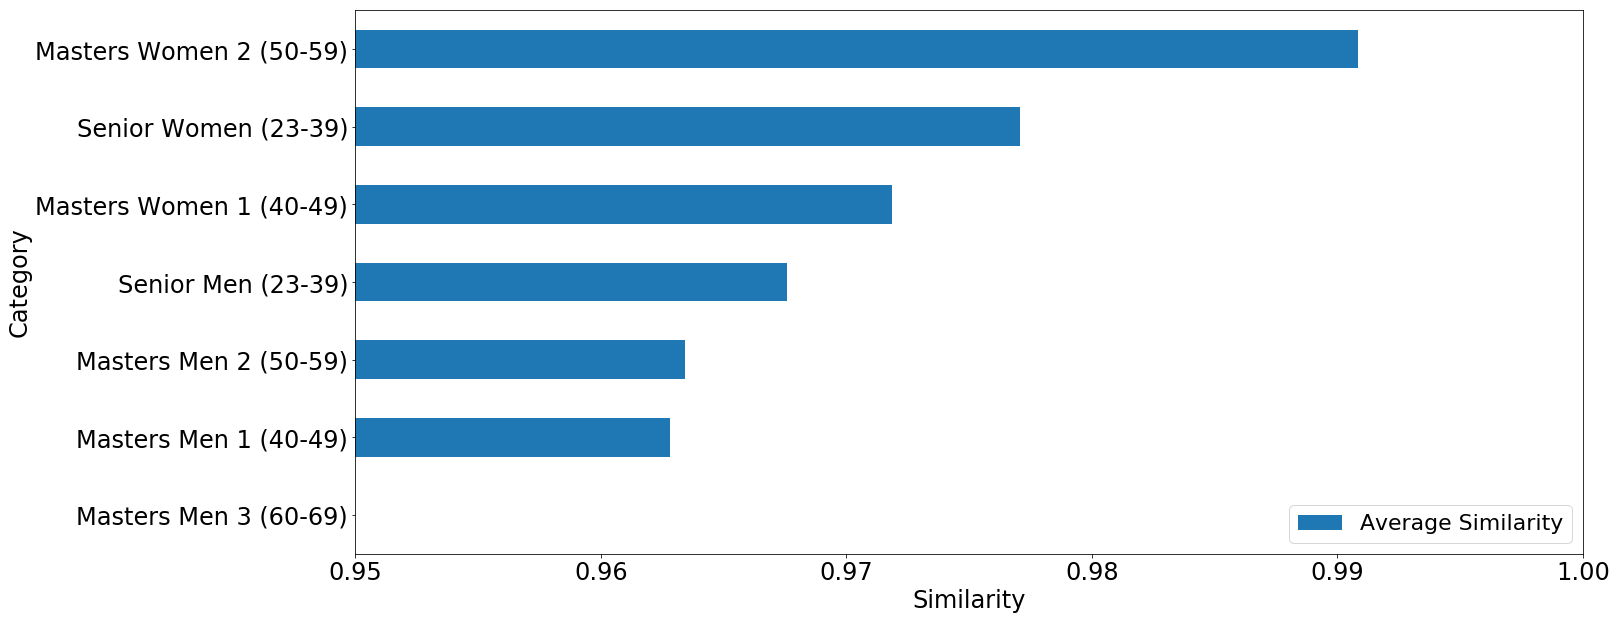

In [70]:
mean_plot = df1.groupby('category').mean()
#mean_plot.drop(mean_plot.index[8], inplace=True)
mean_plot = mean_plot.sort_values(by = 'similarity')
ax = mean_plot.plot.barh(y = 'similarity', rot=0, figsize = (22, 10), fontsize=24)
ax.set_ylabel('Category', fontsize = 24)
ax.set_xlabel('Similarity', fontsize = 24)
ax.set_xlim([0.95, 1])
ax.legend(['Average Similarity'], fontsize = 22, loc = 'lower right')


# Mean Pace Rec

In [72]:
def differ(a, b):
    # Combine two lists (row and query run) into matrix
    matrix = pd.DataFrame({"A": a, "B": b})
    # Now drop any pairs containing NA so we only compare when we have two times
    matrix = matrix.dropna(axis = 0, how='any')
    # Parse back to two lists
    a = matrix[['A']]
    b = matrix[['B']]
    # Return cosine similarity (1 - cosine difference)
    return 1 - spatial.distance.cosine(a, b)

def sims(index):

    pb_segs = list(pb.loc[index])

    result = wt.apply(lambda row: differ(list(row), pb_segs), axis = 1)
    
    return result.loc[index]
    

sims(90)

0.93575330636814025

In [74]:
def update_rows(row):
    index = int(row['similarity'])
    row['similarity'] = sims(index)
   # row['ranked_mean'] = get_rank_mean(neighbours)
    return row

In [75]:
num_of_runs = wt['Start to Lyon Ridge_pb'].count()
filler_data = np.arange(0.0, num_of_runs)
df = pd.DataFrame({'similarity':filler_data})

df = df.apply(lambda row: update_rows(row), axis=1)
df = df[['similarity']]
df

,similarity
0,0.984172
1,0.993242
2,0.885499
3,0.950661
4,0.982858
5,0.971267
6,0.986511
7,0.982812
8,0.981350
9,0.983712


In [77]:
df.to_csv('../../data/ws_mean_similarity.csv')

In [78]:
df1 = comb.join(df)

In [79]:
df1.head()

,category,gender,similarity
0,Masters Men 1 (40-49),Male,0.984172
1,Masters Men 1 (40-49),Male,0.993242
2,Masters Men 2 (50-59),Male,0.885499
3,Masters Men 2 (50-59),Male,0.950661
4,Senior Women (23-39),Female,0.982858


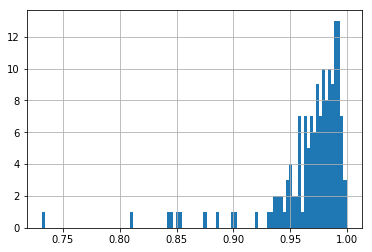

In [80]:
df1['similarity'].hist(bins = 100)

In [81]:
#df1.to_csv('../../data/mean_row_error.csv')

In [82]:
df1.to_csv('../../data/ws_mean_similarity.csv')

In [83]:
df1 = pd.read_csv('../../data/ws_mean_similarity.csv')

In [84]:
male = df1[df1.gender == 'Male']

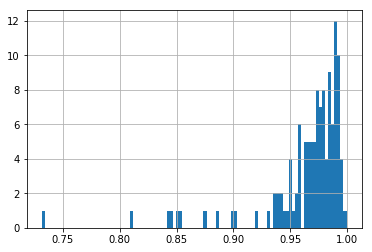

In [85]:
male['similarity'].hist(bins = 100)

In [86]:
female = df1[df1.gender == 'Female']

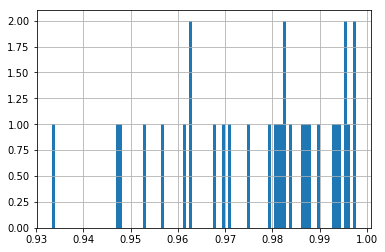

In [87]:
female['similarity'].hist(bins = 100)

In [88]:
d_test = df1.groupby('category').mean()

In [90]:
d_test

,Unnamed: 0,similarity
category,,
Masters Men 1 (40-49),76.039216,0.962824
Masters Men 2 (50-59),83.681818,0.963426
Masters Men 3 (60-69),104.000000,0.949273
Masters Women 1 (40-49),85.416667,0.971847
Masters Women 2 (50-59),124.600000,0.990838
Senior Men (23-39),69.818182,0.967570
Senior Women (23-39),47.785714,0.977081


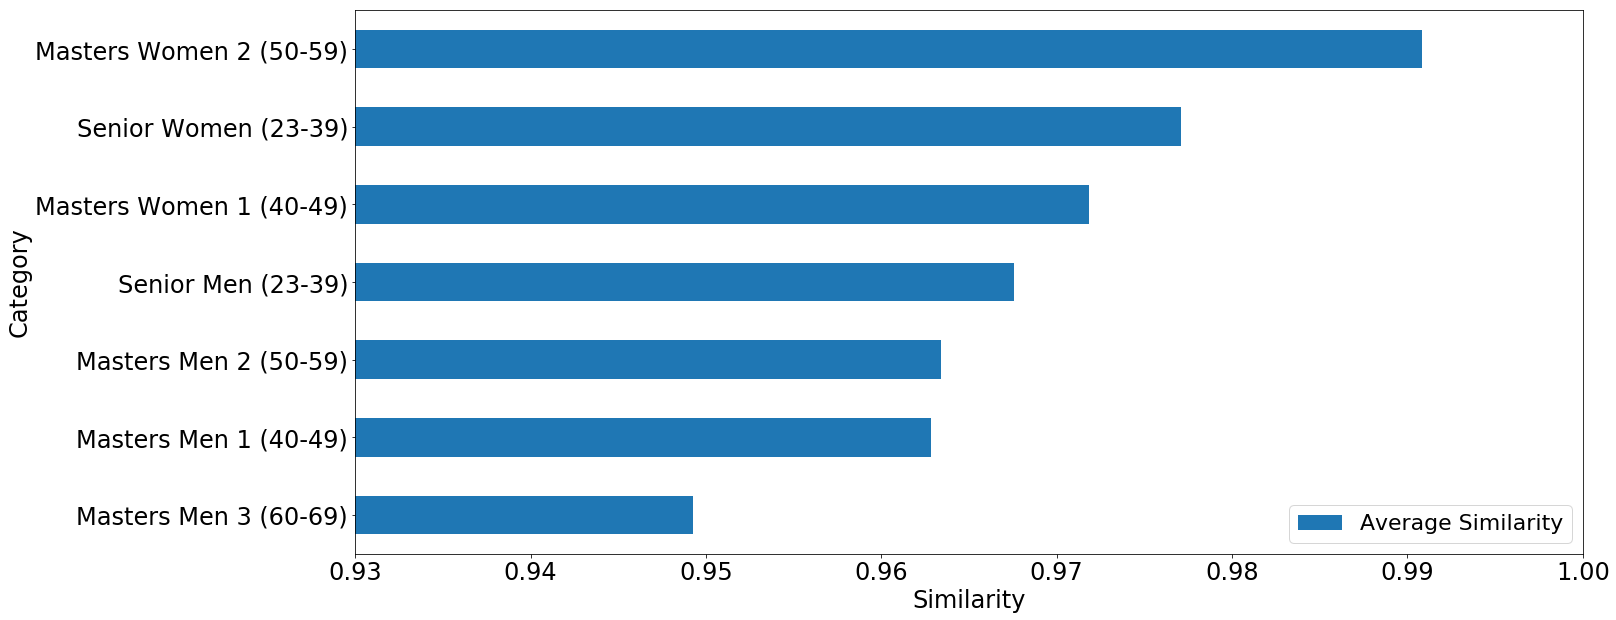

In [93]:
mean_plot = df1.groupby('category').mean()
#mean_plot.drop(mean_plot.index[8], inplace=True)
mean_plot = mean_plot.sort_values(by = 'similarity')
ax = mean_plot.plot.barh(y = 'similarity', rot=0, figsize = (22, 10), fontsize=24)
ax.set_ylabel('Category', fontsize = 24)
ax.set_xlabel('Similarity', fontsize = 24)
ax.set_xlim([0.93, 1])
ax.legend(['Average Similarity'], fontsize = 22, loc = 'lower right')


# Fastest Case Pace Recommendation RMSE

In [94]:
def differ_best(a, b):
    # Combine two lists (row and query run) into matrix
    matrix = pd.DataFrame({"A": a, "B": b})
    # Now drop any pairs containing NA so we only compare when we have two times
    matrix = matrix.dropna(axis = 0, how='any')
    # Parse back to two lists
    a = matrix[['A']]
    b = matrix[['B']]

    return sqrt(mean_squared_error(a, b))

def sims(index):

    pb_segs = list(pb.loc[index])

    result = best.apply(lambda row: differ_best(list(row), pb_segs), axis = 1)
   
    return result.loc[index]


sims(10)

0.30869077412312806

In [95]:
def update_rows_best(row):
    index = int(row['best rms error'])
    row['best rms error'] = sims(index)
   # row['ranked_mean'] = get_rank_mean(neighbours)
    return row

In [97]:
num_of_runs = wt['Start to Lyon Ridge_pb'].count()
filler_data = np.arange(0.0, num_of_runs)
dfb = pd.DataFrame({'best rms error':filler_data})

dfb = dfb.apply(lambda row: update_rows_best(row), axis=1)
dfb = dfb[['best rms error']]
dfb

,best rms error
0,10.393933
1,1.215246
2,10.393933
3,3.888346
4,3.378128
5,4.206586
6,3.237861
7,2.585282
8,2.585282
9,3.861355


In [98]:
dfb.head()

,best rms error
0,10.393933
1,1.215246
2,10.393933
3,3.888346
4,3.378128


In [99]:
dfb.describe()

,best rms error
count,153.000000
mean,3.468096
std,2.401907
min,0.000000
25%,2.129468
50%,3.176620
75%,4.206586
max,13.846333


In [100]:
dfb = comb.join(dfb)

In [101]:
dfb

,category,gender,best rms error
0,Masters Men 1 (40-49),Male,10.393933
1,Masters Men 1 (40-49),Male,1.215246
2,Masters Men 2 (50-59),Male,10.393933
3,Masters Men 2 (50-59),Male,3.888346
4,Senior Women (23-39),Female,3.378128
5,Senior Women (23-39),Female,4.206586
6,Senior Women (23-39),Female,3.237861
7,Senior Women (23-39),Female,2.585282
8,Senior Women (23-39),Female,2.585282
9,Senior Men (23-39),Male,3.861355


In [102]:
dfb.to_csv('../../data/ws_best_row_error.csv')

In [103]:
dfb = pd.read_csv('../../data/ws_best_row_error.csv')

In [104]:
male1 = dfb[dfb.gender == 'Male']

In [106]:
female1 = dfb[dfb.gender == 'Female']

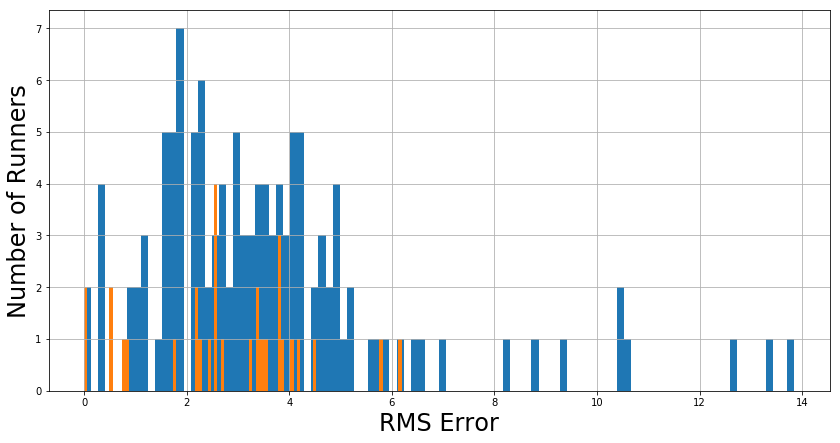

In [107]:
ax1 = male1['best rms error'].hist(bins = 100, figsize=(14, 7))
female1['best rms error'].hist(bins = 100)
ax1.set_ylabel('Number of Runners', fontsize = 24)
ax1.set_xlabel('RMS Error', fontsize = 24)
ax1.legend(fontsize = 14)

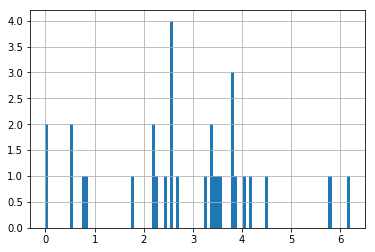

In [108]:
female1['best rms error'].hist(bins = 100)

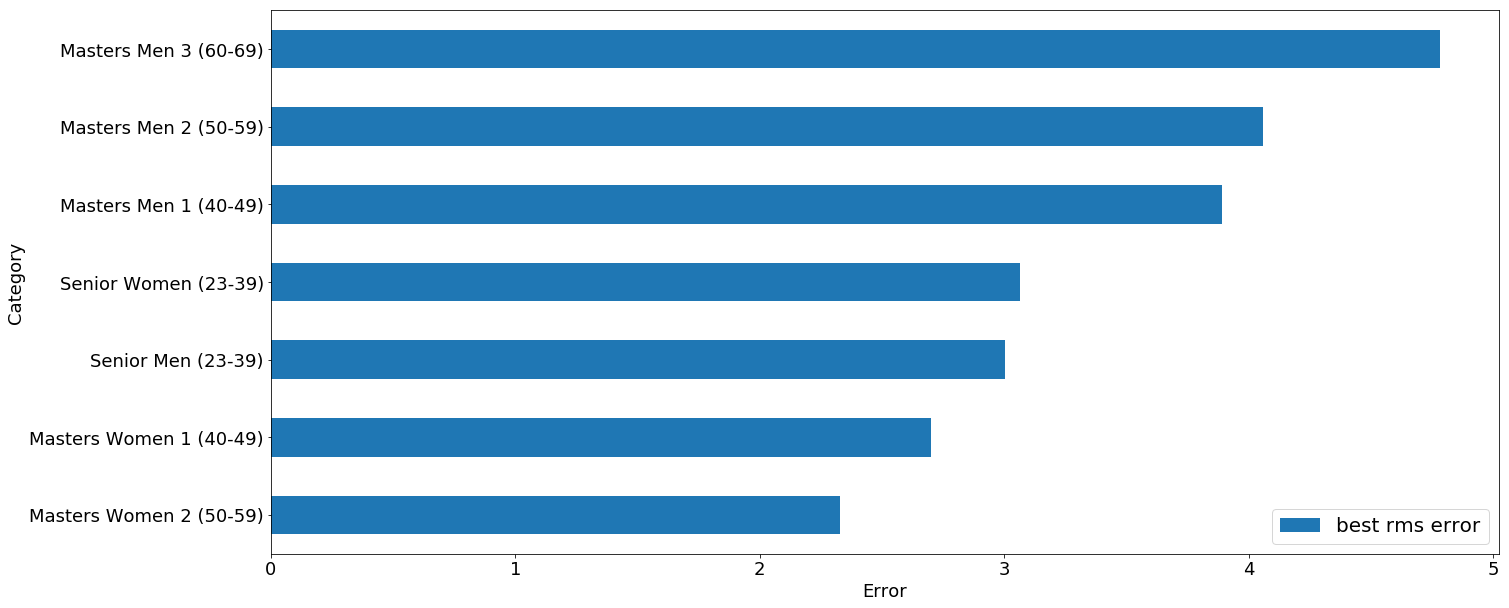

In [109]:
best_plot = dfb.groupby('category').mean()
best_plot = best_plot.sort_values(by = 'best rms error')
ax = best_plot.plot.barh(y = 'best rms error', rot=0, figsize = (22, 10), fontsize=18)
ax.set_ylabel('Category', fontsize = 18)
ax.set_xlabel('Error', fontsize = 18)
ax.legend(fontsize = 20)

In [110]:
best_plot


,Unnamed: 0,best rms error
category,,
Masters Women 2 (50-59),124.600000,2.326299
Masters Women 1 (40-49),85.416667,2.699850
Senior Men (23-39),69.818182,3.002713
Senior Women (23-39),47.785714,3.066218
Masters Men 1 (40-49),76.039216,3.889014
Masters Men 2 (50-59),83.681818,4.058495
Masters Men 3 (60-69),104.000000,4.783179


# Fastest Case Pace Plan Recommendations Percentage Error

In [111]:
def differ_best(a, b):
    # Combine two lists (row and query run) into matrix
    matrix = pd.DataFrame({"A": a, "B": b})
    # Now drop any pairs containing NA so we only compare when we have two times
    matrix = matrix.dropna(axis = 0, how='any')
    # Parse back to two lists
    a = matrix[['A']]
    b = matrix[['B']]
    # Return cosine similarity (1 - cosine difference)
    return 1 - spatial.distance.cosine(a, b)

def sims_best(index):

    pb_segs = list(pb.loc[index])

    result = best.apply(lambda row: differ_best(list(row), pb_segs), axis = 1)
    
    return result.loc[index]
    

sims_best(90)

0.92577769864125437

In [112]:
def update_best(row):
    index = int(row['similarity'])
    row['similarity'] = sims_best(index)
   # row['ranked_mean'] = get_rank_mean(neighbours)
    return row

In [113]:
num_of_runs = best['Start to Lyon Ridge_pb'].count()
filler_data = np.arange(0.0, num_of_runs)
df = pd.DataFrame({'similarity':filler_data})

df = df.apply(lambda row: update_best(row), axis=1)
df = df[['similarity']]
df

,similarity
0,0.994565
1,0.992167
2,0.852742
3,0.953157
4,0.962738
5,0.939858
6,0.936672
7,0.959698
8,0.959698
9,0.929761


In [114]:
#df.to_csv('../../data/mean_row_error.csv')

In [115]:
df.to_csv('../../data/ws_best_similarity.csv')

In [116]:
df1 = comb.join(df)

In [117]:
df1.head()

,category,gender,similarity
0,Masters Men 1 (40-49),Male,0.994565
1,Masters Men 1 (40-49),Male,0.992167
2,Masters Men 2 (50-59),Male,0.852742
3,Masters Men 2 (50-59),Male,0.953157
4,Senior Women (23-39),Female,0.962738


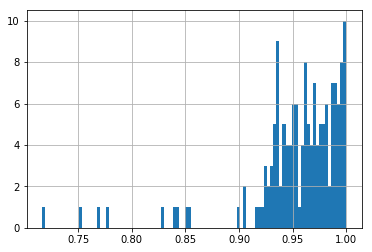

In [118]:
df1['similarity'].hist(bins = 100)

In [119]:
#df1.to_csv('../../data/mean_row_error.csv')

In [120]:
df1.to_csv('../../data/ws_best_similarity.csv')

In [2]:
df1 = pd.read_csv('../../data/ws_best_similarity.csv')

In [3]:
male = df1[df1.gender == 'Male']

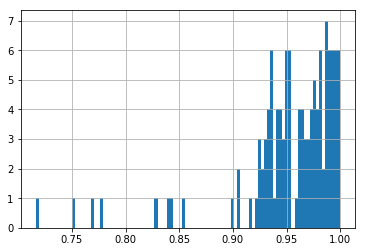

In [4]:
male['similarity'].hist(bins = 100)

In [5]:
female = df1[df1.gender == 'Female']

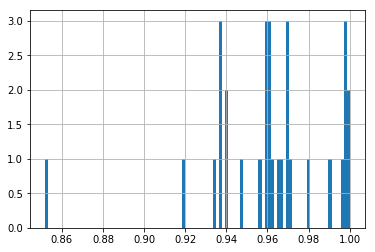

In [6]:
female['similarity'].hist(bins = 100)

In [7]:
d_test = df1.groupby('category').mean()

In [8]:
d_test

,Unnamed: 0,similarity
category,,
Masters Men 1 (40-49),76.039216,0.950157
Masters Men 2 (50-59),83.681818,0.959803
Masters Men 3 (60-69),104.000000,0.939968
Masters Women 1 (40-49),85.416667,0.961142
Masters Women 2 (50-59),124.600000,0.974157
Senior Men (23-39),69.818182,0.953883
Senior Women (23-39),47.785714,0.956655


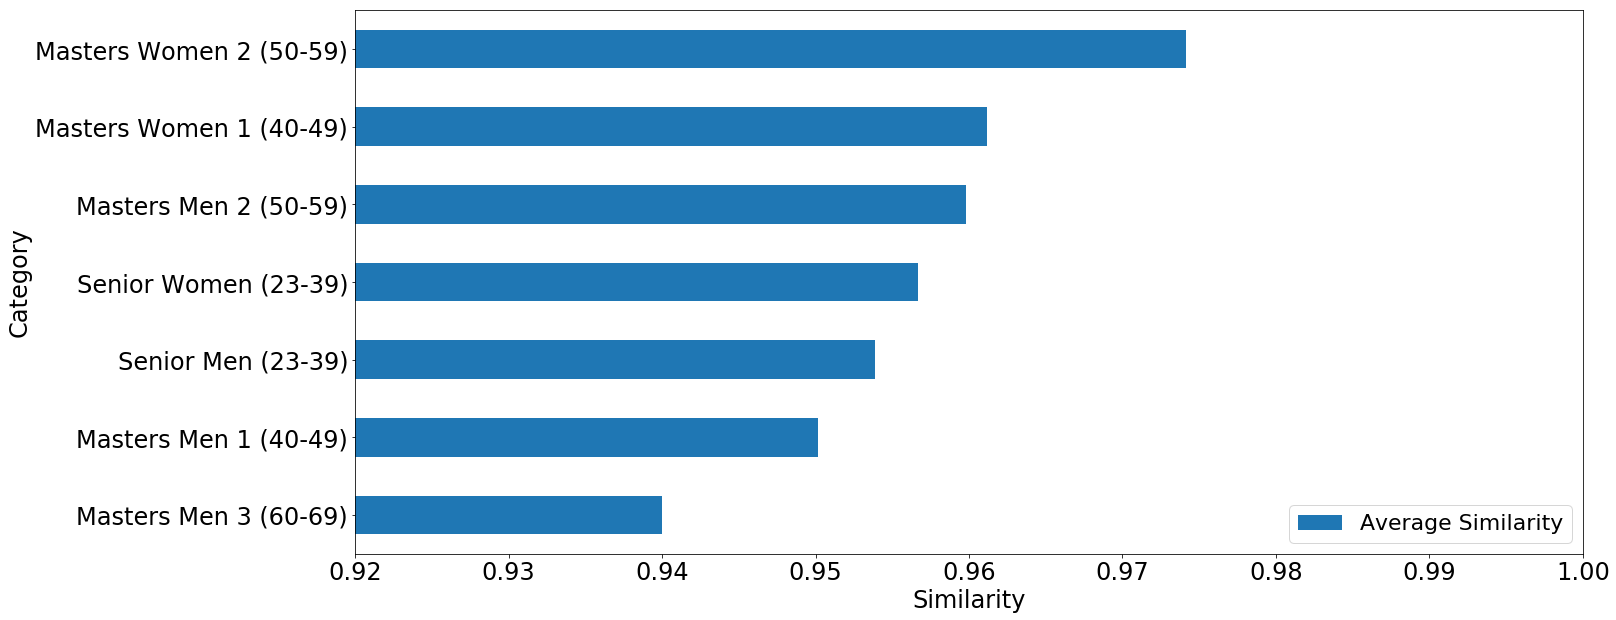

In [9]:
mean_plot = df1.groupby('category').mean()
#mean_plot.drop(mean_plot.index[8], inplace=True)
mean_plot = mean_plot.sort_values(by = 'similarity')
ax = mean_plot.plot.barh(y = 'similarity', rot=0, figsize = (22, 10), fontsize=24)
ax.set_ylabel('Category', fontsize = 24)
ax.set_xlabel('Similarity', fontsize = 24)
ax.set_xlim([0.92, 1])
ax.legend(['Average Similarity'], fontsize = 22, loc = 'lower right')


In [10]:
mm1 = df1[df1.category == 'Masters Men 1 (40-49)']
mm1 = mm1.similarity
mm2 = df1[df1.category == 'Masters Men 2 (50-59)']
mm2 = mm2.similarity
mm3 = df1[df1.category == 'Masters Men 3 (60-69)']
mm3 = mm3.similarity
mw1 = df1[df1.category == 'Masters Women 1 (40-49)']
mw1 = mw1.similarity
mw2 = df1[df1.category == 'Masters Women 2 (50-59)']
mw2 = mw2.similarity
sm = df1[df1.category == 'Senior Men (23-39)']
sm = sm.similarity
sw = df1[df1.category == 'Senior Women (23-39)']
sw = sw.similarity

In [11]:
fast = [sm.mean(), mm1.mean(), mm2.mean(), mm3.mean(), sw.mean(), mw1.mean(), mw2.mean()]

In [12]:
fast

[0.9538828534014379,
 0.9501565903665548,
 0.9598033618653168,
 0.9399678904725587,
 0.9566551182684292,
 0.9611422040270238,
 0.9741570478194168]

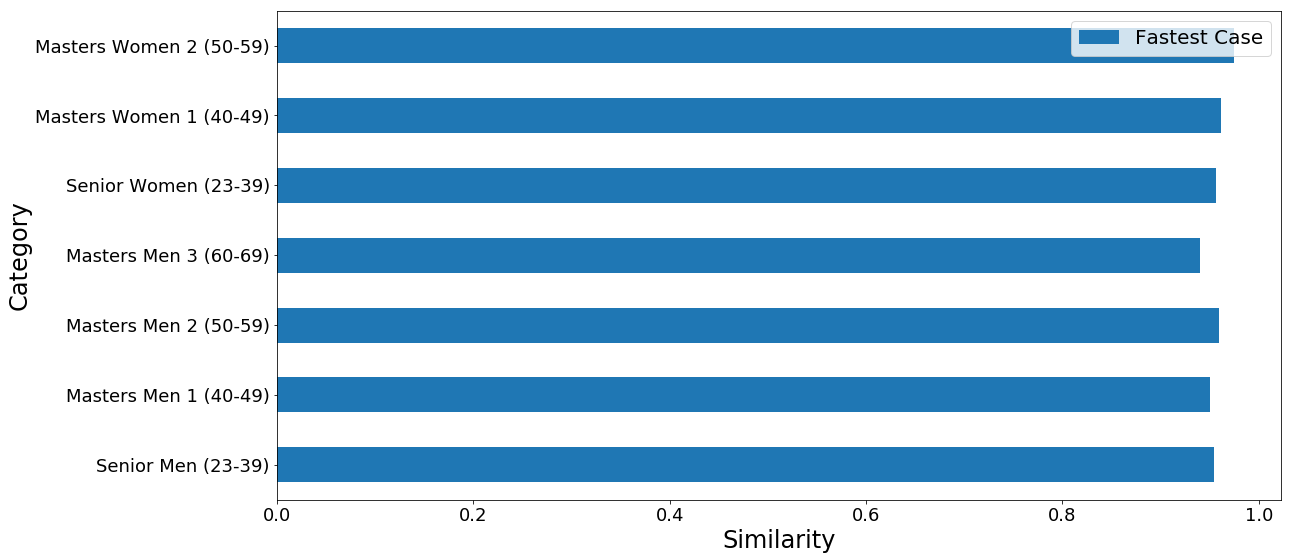

In [13]:
index = ['Senior Men (23-39)', 'Masters Men 1 (40-49)', 'Masters Men 2 (50-59)', 'Masters Men 3 (60-69)', 'Senior Women (23-39)', 'Masters Women 1 (40-49)', 'Masters Women 2 (50-59)']
gra_w = pd.DataFrame({'Fastest Case': fast}, index=index)
ax = gra_w.plot.barh(figsize=(18, 9), fontsize=18, rot=0)
ax.set_ylabel('Category', fontsize = 24)
ax.set_xlabel('Similarity', fontsize = 24)
ax.legend(fontsize = 20)

In [14]:
mw1

20     0.947766
31     0.990657
41     1.000000
42     1.000000
62     0.969279
63     0.979673
102    0.937458
114    0.995816
127    0.960494
128    0.959698
144    0.852059
151    0.940807
Name: similarity, dtype: float64

In [15]:
df3 = pd.read_csv('../../data/ws_mean_similarity.csv')

In [16]:
df3.head()

,Unnamed: 0,category,gender,similarity
0,0,Masters Men 1 (40-49),Male,0.984172
1,1,Masters Men 1 (40-49),Male,0.993242
2,2,Masters Men 2 (50-59),Male,0.885499
3,3,Masters Men 2 (50-59),Male,0.950661
4,4,Senior Women (23-39),Female,0.982858


In [17]:
mm1 = df3[df3.category == 'Masters Men 1 (40-49)']
mm1 = mm1.similarity
mm2 = df3[df3.category == 'Masters Men 2 (50-59)']
mm2 = mm2.similarity
mm3 = df3[df3.category == 'Masters Men 3 (60-69)']
mm3 = mm3.similarity
mw1 = df3[df3.category == 'Masters Women 1 (40-49)']
mw1 = mw1.similarity
mw2 = df3[df3.category == 'Masters Women 2 (50-59)']
mw2 = mw2.similarity
sm = df3[df3.category == 'Senior Men (23-39)']
sm = sm.similarity
sw = df3[df3.category == 'Senior Women (23-39)']
sw = sw.similarity

In [18]:
mean = [mm3.mean(), mm1.mean(), mm2.mean(), sm.mean(), mw1.mean(), sw.mean(), mw2.mean()]

In [19]:
mean

[0.9492733522082368,
 0.962823989031531,
 0.9634260353244819,
 0.9675698233836432,
 0.9718468520220108,
 0.9770806486506162,
 0.9908375378958562]

(0.92, 1)

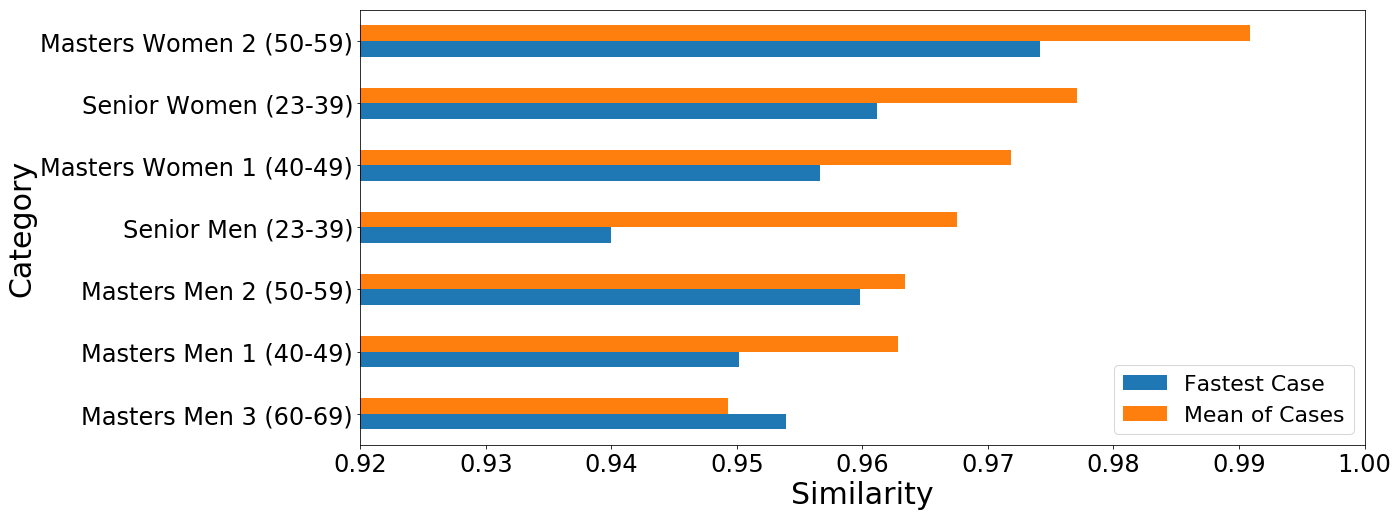

In [21]:
index = ['Masters Men 3 (60-69)', 'Masters Men 1 (40-49)', 'Masters Men 2 (50-59)', 'Senior Men (23-39)', 'Masters Women 1 (40-49)', 'Senior Women (23-39)', 'Masters Women 2 (50-59)']
gra_w = pd.DataFrame({'Fastest Case': fast, 'Mean of Cases': mean}, index=index)
ax = gra_w.plot.barh(figsize=(18, 8), fontsize=24, rot=0)
ax.set_ylabel('Category', fontsize = 30)
ax.set_xlabel('Similarity', fontsize = 30)
ax.legend(fontsize = 22)
ax.set_xlim([0.92, 1])

For Western States, the mean of cases pacing plan recommendation, the similarities are not as
high at that of the UTMB.
However, the lowest is just below 0.95, which is still a very high similarity. The trend of females
receiving better recommendations continue, with the top three categories all being women and
in the exact same order as the UTMB results. This indicates that the age of these runners could
have an effect on the recommendations. However, the rest of the categories reflect no trend to
the results in Figure 4.13. There is certainly no trend to say that as runners get older/younger
the recommendations get better. Like the UTMB, there is a drop in similarity for the fastest case
pacing plan recommendation. This is the first recommendation where there is a male category
in the top three categories, as Senior Women (23-39) has dropped by more than 0.02 from the
mean of cases recommendation. This is the only change in order from the mean results.
